In [1]:
pip install allensdk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import shutil
import allensdk
import pprint
from pathlib import Path

import numpy as np
import pandas as pd
import scipy.stats as st

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [3]:
#this code block should only be run if you are working with the brain observatory Ca2+ imaging data
from allensdk.core.brain_observatory_cache import BrainObservatoryCache

drive_path = '/overflow/NSCI274/projects/BrainObservatoryOPhysData/'

manifest_file = os.path.join(drive_path,'manifest.json')

boc = BrainObservatoryCache(manifest_file=manifest_file)

In [4]:
#this code block should only be run if you are working with the visual behavior Ca2+ imaging data
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

data_storage_directory = Path("/overflow/NSCI274/projects/ophysdata")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

In [5]:
ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of ophys experiments: {len(ophys_experiments)}\n")

print(ophys_experiments.columns)

ophys_experiments.head(100)

Total number of ophys experiments: 1941

Index(['equipment_name', 'full_genotype', 'mouse_id', 'reporter_line',
       'driver_line', 'sex', 'age_in_days', 'cre_line', 'indicator',
       'session_number', 'prior_exposures_to_session_type',
       'prior_exposures_to_image_set', 'prior_exposures_to_omissions',
       'ophys_session_id', 'behavior_session_id', 'ophys_container_id',
       'project_code', 'imaging_depth', 'targeted_structure',
       'date_of_acquisition', 'session_type', 'experience_level', 'passive',
       'image_set', 'file_id'],
      dtype='object')


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
951980486,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028360,VisualBehaviorMultiscope,300,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400869
951980473,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400919
951980481,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028357,VisualBehaviorMultiscope,225,VISl,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400972
951980471,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085394308
951980475,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-20 09:45:29.897856,OPHYS_1_images_A,Familiar,False,A,1085400920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878358326,CAM2P.4,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-G...,448900,Ai94(TITL-GCaMP6s),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",M,136.0,Slc17a7-IRES2-Cre,GCaMP6s,6.0,...,863992815,VisualBehavior,175,VISp,2019-05-30 17:29:35.000000,OPHYS_6_images_B,Novel >1,False,B,879255318
939327156,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,180.0,Slc17a7-IRES2-Cre,GCaMP6f,1.0,...,930022332,VisualBehavior,175,VISp,2019-09-04 15:26:03.000000,OPHYS_1_images_A,Familiar,False,A,939486362
940354166,CAM2P.3,Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-G...,459777,Ai93(TITL-GCaMP6f),"[Slc17a7-IRES2-Cre, Camk2a-tTA]",F,181.0,Slc17a7-IRES2-Cre,GCaMP6f,2.0,...,930022332,VisualBehavior,175,VISp,2019-09-05 15:43:21.000000,OPHYS_2_images_A_passive,Familiar,True,A,940418592


In [6]:
ophys_experiments.full_genotype.unique()

array(['Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
       'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt',
       'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/wt'],
      dtype=object)

#### Inhibitory 

In [7]:
plsmales1 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales2 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsmales3 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsmales4 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# males familiar total is plsmales1 + plsmales2 + plsmales3 + plsmales4
plsmalesf = pd.concat([plsmales1, plsmales2], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales3], axis=0)

plsmalesf = pd.concat([plsmalesf, plsmales4], axis=0)
            
plsmalesf.head(9)

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
961283857,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467302,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,174.0,Sst-IRES-Cre,GCaMP6f,2.0,...,957024596,VisualBehavior,290,VISp,2019-10-04 21:12:37.000000,OPHYS_2_images_A_passive,Familiar,True,A,961328900
1050720434,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,533527,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,121.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1049224697,VisualBehavior,275,VISp,2020-09-15 18:01:45.000000,OPHYS_2_images_A_passive,Familiar,True,A,1050776175
1081264133,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027847,VisualBehaviorMultiscope,306,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144562
1081264129,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546605,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,182.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1079027842,VisualBehaviorMultiscope,229,VISp,2021-02-03 09:02:40.051049,OPHYS_2_images_A_passive,Familiar,True,A,1120144552
1007929142,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,495789,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,159.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1006071814,VisualBehavior,275,VISp,2020-02-17 16:45:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1007966514
1081832027,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,546819,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,183.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1080284671,VisualBehavior,275,VISp,2021-02-05 22:18:01.000000,OPHYS_2_images_A_passive,Familiar,True,A,1120143039
1043218895,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,524274,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1039579201,VisualBehavior,275,VISp,2020-08-14 17:53:53.000000,OPHYS_2_images_A_passive,Familiar,True,A,1044397946
867410509,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028429,VisualBehaviorMultiscope,225,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397924
867410516,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,448366,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,118.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028423,VisualBehaviorMultiscope,75,VISp,2019-05-13 12:36:19.000000,OPHYS_2_images_A_passive,Familiar,True,A,1085397946


In [8]:
new_mf = plsmalesf.index

In [9]:
plsmales5 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales6 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsmales7 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsmales8 = ophys_experiments[(ophys_experiments.sex=='M') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# males novel total is plsmales5 + plsmales6 + plsmales7 + plsmales8

plsmalesn = pd.concat([plsmales5, plsmales6], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales7], axis=0)

plsmalesn = pd.concat([plsmalesn, plsmales8], axis=0)
            
plsmalesn.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
995622557,CAM2P.4,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,476970,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,203.0,Sst-IRES-Cre,GCaMP6f,5.0,...,991913453,VisualBehaviorTask1B,275,VISp,2019-12-20 18:26:12.000000,OPHYS_5_images_A_passive,Novel >1,True,A,995659072
993593393,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,485688,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,149.0,Sst-IRES-Cre,GCaMP6f,5.0,...,989461845,VisualBehaviorTask1B,275,VISp,2019-12-10 17:38:29.000000,OPHYS_5_images_A_passive,Novel >1,True,A,993634306
982862427,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,477202,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,165.0,Sst-IRES-Cre,GCaMP6f,5.0,...,975371413,VisualBehaviorTask1B,275,VISp,2019-11-14 20:10:30.000000,OPHYS_5_images_A_passive,Novel >1,True,A,982976718
1012112426,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,498972,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,152.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1006386845,VisualBehaviorTask1B,275,VISp,2020-03-03 18:24:50.000000,OPHYS_5_images_A_passive,Novel >1,True,A,1012177053
1003456269,CAM2P.3,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489056,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,177.0,Sst-IRES-Cre,GCaMP6f,6.0,...,999191979,VisualBehaviorTask1B,275,VISp,2020-01-28 19:38:04.000000,OPHYS_5_images_A_passive,Novel >1,False,A,1003552807


In [10]:
new_mn = plsmalesn.index

In [11]:
plsfemales1 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales2 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

plsfemales3 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_A_passive')]

plsfemales4 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_2_images_B_passive')]

# females familiar total is plsfemales1 + plsfemales2 + plsfemales3 + plsfemales4

plsfemalesf = pd.concat([plsfemales1, plsfemales2], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales3], axis=0)

plsfemalesf = pd.concat([plsfemalesf, plsfemales4], axis=0)
            
plsfemalesf.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
953659743,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012706
953659745,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive,Familiar,True,A,1086012793
956903375,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,150.0,Sst-IRES-Cre,GCaMP6f,2.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-09-26 17:34:33.000000,OPHYS_2_images_B_passive,Familiar,True,B,957356891
798404219,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,412036,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,156.0,Vip-IRES-Cre,GCaMP6f,2.0,...,791352433,VisualBehavior,175,VISp,2018-12-18 23:26:29.000000,OPHYS_2_images_A_passive,Familiar,True,A,859888258
1066177684,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,538219,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,167.0,Vip-IRES-Cre,GCaMP6f,2.0,...,1064333290,VisualBehavior,175,VISp,2020-11-25 16:08:44.000000,OPHYS_2_images_A_passive,Familiar,True,A,1066218438


In [12]:
new_ff = plsfemalesf.index

In [13]:
plsfemales5 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales6 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

plsfemales7 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_A_passive')]

plsfemales8 = ophys_experiments[(ophys_experiments.sex=='F') &
                            (ophys_experiments.full_genotype=='Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt')&
                            (ophys_experiments.targeted_structure=='VISp')&
                             (ophys_experiments.session_type=='OPHYS_5_images_B_passive')]

# females novel total is plsfemales5 + plsfemales6 + plsfemales7 + plsfemales8

plsfemalesn = pd.concat([plsfemales5, plsfemales6], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales7], axis=0)

plsfemalesn = pd.concat([plsfemalesn, plsfemales8], axis=0)
            
plsfemalesn.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,...,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,session_type,experience_level,passive,image_set,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
960351917,CAM2P.5,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,470784,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,156.0,Sst-IRES-Cre,GCaMP6f,5.0,...,941373529,VisualBehaviorTask1B,275,VISp,2019-10-02 18:23:56.000000,OPHYS_5_images_A_passive,Novel >1,True,A,960425985
959388790,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028345,VisualBehaviorMultiscope,225,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012436
959388792,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028339,VisualBehaviorMultiscope,75,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012475
959388788,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,217.0,Sst-IRES-Cre,GCaMP6f,5.0,...,1018028342,VisualBehaviorMultiscope,150,VISp,2019-10-01 08:25:28.921369,OPHYS_5_images_B_passive,Novel >1,True,B,1086012491
994053909,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,489066,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,130.0,Vip-IRES-Cre,GCaMP6f,5.0,...,991913246,VisualBehaviorTask1B,175,VISp,2019-12-12 17:15:46.000000,OPHYS_5_images_A_passive,Novel >1,True,A,994100291


In [14]:
new_fn = plsfemalesn.index

### Bar Graphs for Figure 1

#### Data sets for bar graphs

In [15]:
M_ophys_exp_data = ophys_experiments[ophys_experiments.sex == 'M']
type(M_ophys_exp_data)
print("Total Number of Males is: " + str(len(M_ophys_exp_data)))

F_ophys_exp_data = ophys_experiments[ophys_experiments.sex == 'F']
print("Total Number of Females is: " + str(len(F_ophys_exp_data)))

Total Number of Males is: 1267
Total Number of Females is: 674


In [16]:
M_Excitatory_ophys_exp_id = (M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt']
                + M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt'])

print("Total Number of Male Neurons that are Excitatory is: " + str(len(M_Excitatory_ophys_exp_id)))

M_Inhibitory_ophys_exp_id = (M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']
                + M_ophys_exp_data[M_ophys_exp_data.full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'])

print("Total Number of Male Neurons that are Inhibitory is: " + str(len(M_Inhibitory_ophys_exp_id)))

Total Number of Male Neurons that are Excitatory is: 36
Total Number of Male Neurons that are Inhibitory is: 705


In [17]:
F_Excitatory_ophys_exp_id = (F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt']
                + F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt'])

print("Total number of inhibitory neurons measured for females is: " + str(len(F_Excitatory_ophys_exp_id)))

F_Inhibitory_ophys_exp_id = (F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt']
                + F_ophys_exp_data[F_ophys_exp_data.full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt'])

print("Total number of inhibitory neurons measured for females is: " + str(len(F_Inhibitory_ophys_exp_id)))

Total number of inhibitory neurons measured for females is: 20
Total number of inhibitory neurons measured for females is: 365


In [18]:
M_Excitatory_ophys_exp_tot = []
for i in range(len(M_ophys_exp_data)):
    full_genotype = M_ophys_exp_data.iloc[i,1]
    x = M_ophys_exp_data.iloc[i].array
    if full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt':
        M_Excitatory_ophys_exp_tot.append(x)
    elif full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt':
        M_Excitatory_ophys_exp_tot.append(x)
print("The number of excitatory neurons measured for males is: " + str(len(M_Excitatory_ophys_exp_tot)))

The number of excitatory neurons measured for males is: 36


In [19]:
F_Excitatory_ophys_exp_tot = []

for i in range(len(F_ophys_exp_data)):
    full_genotype = F_ophys_exp_data.iloc[i,1]
    x = F_ophys_exp_data.iloc[i].array
    if full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6s)/wt':
        F_Excitatory_ophys_exp_tot.append(x)
    elif full_genotype == 'Slc17a7-IRES2-Cre/wt;Camk2a-tTA/wt;Ai94(TITL-GCaMP6s)/wt':
        F_Excitatory_ophys_exp_tot.append(x)
print("The number of excitatory neurons measured for females is: " + str(len(F_Excitatory_ophys_exp_tot)))

The number of excitatory neurons measured for females is: 20


In [20]:
M_Inhibitory_ophys_exp_tot = []

for i in range(len(M_ophys_exp_data)):
    full_genotype = M_ophys_exp_data.iloc[i,1]
    x = M_ophys_exp_data.iloc[i].array
    if full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        M_Inhibitory_ophys_exp_tot.append(x)
    elif full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        M_Inhibitory_ophys_exp_tot.append(x)
print("The number of inhibitory neurons measured for males is: " + str(len(M_Inhibitory_ophys_exp_tot)))

The number of inhibitory neurons measured for males is: 705


In [21]:
F_Inhibitory_ophys_exp_tot = []

for i in range(len(F_ophys_exp_data)):
    full_genotype = F_ophys_exp_data.iloc[i,1]
    x = F_ophys_exp_data.iloc[i].array
    if full_genotype == 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        F_Inhibitory_ophys_exp_tot.append(x)
    elif full_genotype == 'Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt':
        F_Inhibitory_ophys_exp_tot.append(x)
print("The number of inhibitory neurons measured for females is: " + str(len(F_Inhibitory_ophys_exp_tot)))

The number of inhibitory neurons measured for females is: 365


In [22]:
M_EOET_VISp = []

for i in range(len(M_Excitatory_ophys_exp_tot)):
    target_structure = M_Excitatory_ophys_exp_tot[i][18]
    x = M_Excitatory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        M_EOET_VISp.append(x)
print("The number of excitatory neurons measured for males in the VISp is: " + str(len(M_EOET_VISp)))

The number of excitatory neurons measured for males in the VISp is: 36


In [23]:
F_EOET_VISp = []

for i in range(len(F_Excitatory_ophys_exp_tot)):
    target_structure = F_Excitatory_ophys_exp_tot[i][18]
    x = F_Excitatory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        F_EOET_VISp.append(x)
print("The number of excitatory neurons measured for females in the VISp is: " + str(len(F_EOET_VISp)))

The number of excitatory neurons measured for females in the VISp is: 20


In [24]:
M_IOET_VISp = []

for i in range(len(M_Inhibitory_ophys_exp_tot)):
    target_structure = M_Inhibitory_ophys_exp_tot[i][18]
    x = M_Inhibitory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        M_IOET_VISp.append(x)
print("The number of inhibitory neurons measured for males in the VISp is: " + str(len(M_IOET_VISp)))

The number of inhibitory neurons measured for males in the VISp is: 391


In [25]:
F_IOET_VISp = []

for i in range(len(F_Inhibitory_ophys_exp_tot)):
    target_structure = F_Inhibitory_ophys_exp_tot[i][18]
    x = F_Inhibitory_ophys_exp_tot[i]
    if target_structure == 'VISp':
        F_IOET_VISp.append(x)
print("The number of inhibitory neurons measured for females in the VISp is: " + str(len(F_IOET_VISp)))

The number of inhibitory neurons measured for females in the VISp is: 155


In [26]:
M_IOETV_Familiar = []

for i in range(len(M_IOET_VISp)):
    session_type = M_IOET_VISp[i][20]
    x = M_IOET_VISp[i]
    if session_type == 'OPHYS_2_images_A_passive':
        M_IOETV_Familiar.append(x)
    elif session_type == 'OPHYS_2_images_B_passive':
        M_IOETV_Familiar.append(x)
print("The number of trials for males passively viewing familiar images is: " + str(len(M_IOETV_Familiar)))

The number of trials for males passively viewing familiar images is: 51


In [27]:
M_IOETV_Novel = []

for i in range(len(M_IOET_VISp)):
    session_type = M_IOET_VISp[i][20]
    x = M_IOET_VISp[i]
    if session_type == 'OPHYS_5_images_A_passive':
        M_IOETV_Novel.append(x)
    elif session_type == 'OPHYS_5_images_B_passive':
        M_IOETV_Novel.append(x)
print("The number of trials males passively viewing novel images is: " + str(len(M_IOETV_Novel)))

The number of trials males passively viewing novel images is: 48


In [28]:
F_IOETV_Familiar = []

for i in range(len(F_IOET_VISp)):
    session_type = F_IOET_VISp[i][20]
    x = F_IOET_VISp[i]
    if session_type == 'OPHYS_2_images_A_passive':
        F_IOETV_Familiar.append(x)
    elif session_type == 'OPHYS_2_images_B_passive':
        F_IOETV_Familiar.append(x)
print("The number of trials for females passively viewing familiar images is: " + str(len(F_IOETV_Familiar)))

The number of trials for females passively viewing familiar images is: 11


In [29]:
F_IOETV_Novel = []

for i in range(len(F_IOET_VISp)):
    session_type = F_IOET_VISp[i][20]
    x = F_IOET_VISp[i]
    if session_type == 'OPHYS_5_images_A_passive':
        F_IOETV_Novel.append(x)
    elif session_type == 'OPHYS_5_images_B_passive':
        F_IOETV_Novel.append(x)
print("The number of trials females passively viewing novel images is: " + str(len(F_IOETV_Novel)))

The number of trials females passively viewing novel images is: 13


#### Sex Bar Graph

In [30]:
ssfont = {'fontname':'sans-serif'}

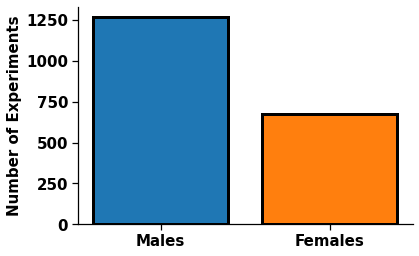

In [47]:
Sexes = ['Males','Females']
num_of_exp = [len(M_ophys_exp_data),len(F_ophys_exp_data)]

plt.bar(Sexes, num_of_exp,color=['tab:blue', 'tab:orange'],edgecolor='black', linewidth = 3)
plt.xticks(fontsize = 15, fontweight="bold")
plt.yticks(fontsize = 15, fontweight="bold")
plt.ylabel('Number of Experiments', **ssfont, fontsize = 15, fontweight="bold")
sns.despine(right = True)
plt.show()

#### Cell Type Bar Graph (Figure 1b)

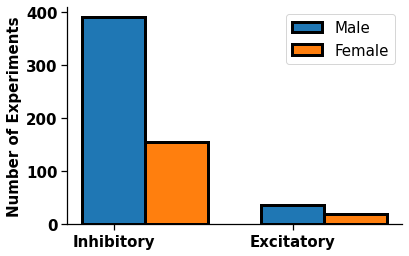

In [52]:
Cells = ['Inhibitory','Excitatory']
Sex=['Male','Female']
pos = np.arange(len(Sex))
bar_width = 0.35
num_males=[len(M_IOET_VISp),len(M_EOET_VISp)]
num_females=[len(F_IOET_VISp),len(F_EOET_VISp)]
 
plt.bar(pos,num_males,bar_width,color='tab:blue',edgecolor='black', linewidth = 3)
plt.bar(pos+bar_width,num_females,bar_width,color='tab:orange',edgecolor='black', linewidth = 3)
plt.xticks(pos,Cells, fontsize = 15, fontweight="bold")
plt.yticks(fontsize = 15, fontweight="bold")
plt.ylabel('Number of Experiments', fontsize=15, fontweight="bold")
plt.legend(Sex, fontsize = 15)
sns.despine(right = True)
plt.show()


#### Inhibitory cells by sex by stimuli (Figure 2 of Figure 1C?)

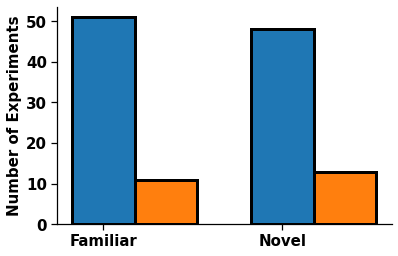

In [53]:
Cells = ['Familiar', 'Novel']
Sex=['Male','Female']
pos = np.arange(len(Sex))
bar_width = 0.35
num_males=[len(M_IOETV_Familiar),len(M_IOETV_Novel)]
num_females=[len(F_IOETV_Familiar),len(F_IOETV_Novel)]
 
plt.bar(pos,num_males,bar_width,color='tab:blue',edgecolor='black', linewidth = 3)
plt.bar(pos+bar_width,num_females,bar_width,color='tab:orange',edgecolor='black', linewidth = 3)
plt.xticks(pos,Cells, fontsize = 15, fontweight="bold")
plt.yticks(fontsize = 15, fontweight="bold")
plt.ylabel('Number of Experiments', fontsize=15, fontweight="bold")
sns.despine(right = True)
plt.show()

#### Look at adjusting the graph to look better (turn the x axis diagonal perhaps to make the name more formal) or color coat the males and females)

In [34]:
figure2am = plsmalesf.loc[[new_mf[35]]]
figure2af = plsfemalesf.loc[[new_ff[1]]]
#get the 8th index of plsmalesf and plsfemalesf

In [35]:
figure2bm = plsmalesn.loc[[new_mn[42]]]
figure2bf = plsfemalesn.loc[[new_fn[11]]]
#get the 11th index of plsmalesn and plsfemalesn

### Figure 2: Event Traces 

#### Event Trace of One Male Familiar Experiment and One Female Familiar Experiment 

/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not

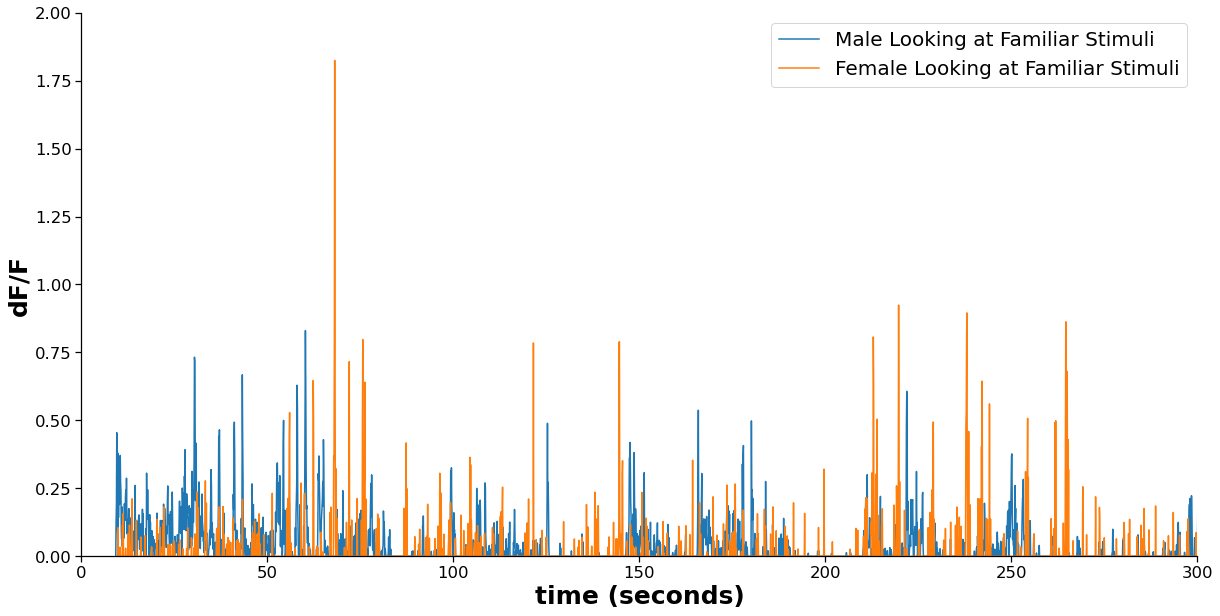

In [59]:
fig, ax = plt.subplots(1,1, figsize = (20,10))

#Male

for index in range(len(figure2am)): 
    ophys_experiment_idmf = figure2am.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    ophys_timestamps = datasetmf.ophys_timestamps
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    sexm = "Male"
    stimulim = "Looking at Familiar Stimuli"
    ax.plot(ophys_timestamps, average_dFFevents, label = sexm+" "+stimulim, color = "tab:blue")
ax.set_ylabel('dF/F', fontsize = 25, fontweight="bold")
ax.set_xlabel('time (seconds)', fontsize = 25, fontweight="bold")
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend(fontsize = 20)     
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

#Female
for index in range(len(figure2af)): 
    ophys_experiment_idf = figure2af.index[index]
    datasetf = cache.get_behavior_ophys_experiment(ophys_experiment_idf)
    ophys_timestamps = datasetf.ophys_timestamps
    dff_events = datasetf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    sexf = "Female"
    stimulif = "Looking at Familiar Stimuli"
    ax.plot(ophys_timestamps, average_dFFevents, label = sexf+" "+stimulif, color = "tab:orange")
ax.set_ylabel('dF/F', fontsize = 25, fontweight="bold")
ax.set_xlabel('time (seconds)', fontsize = 25, fontweight="bold")
ax.set_xlim(0, 5*60)
ax.set_ylim(0, 2.0)
ax.legend(fontsize = 20) 

#### Event Trace of One Male Novel Experiment and One Female Novel Experiment 

/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not

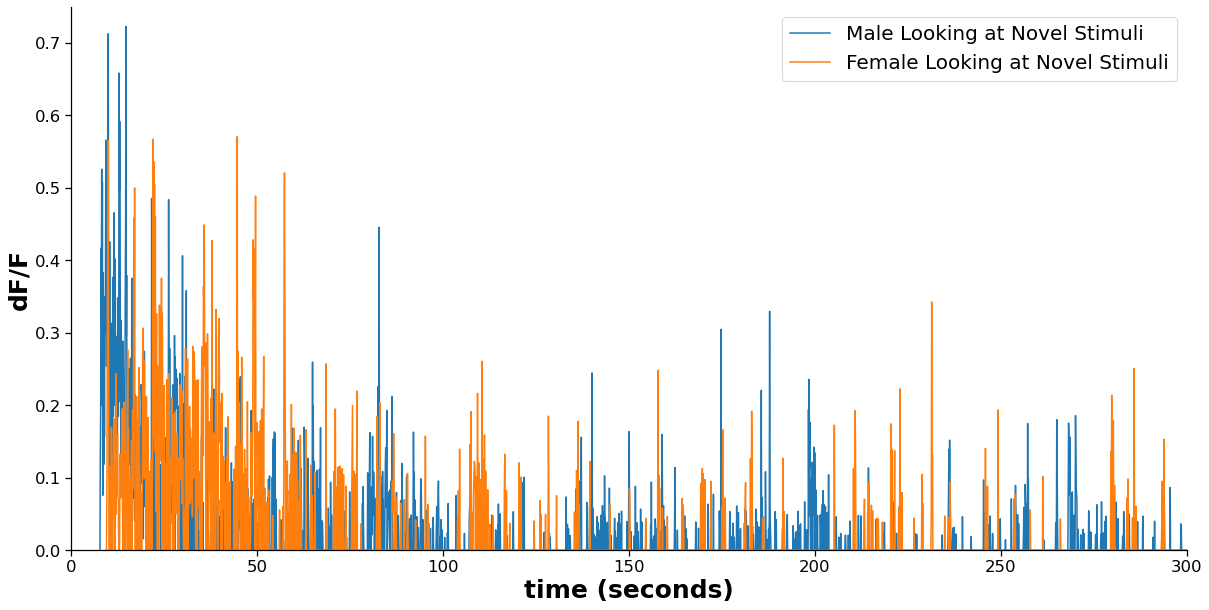

In [60]:
fig, ax = plt.subplots(1,1, figsize = (20,10))

#Male

for index in range(len(figure2bm)): 
    ophys_experiment_idmf = figure2bm.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    ophys_timestamps = datasetmf.ophys_timestamps
    dff_events = datasetmf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    sexm = "Male"
    stimulim = "Looking at Novel Stimuli"
    ax.plot(ophys_timestamps, average_dFFevents, label = sexm+" "+stimulim, color = "tab:blue")
ax.set_ylabel('dF/F', fontsize = 25, fontweight="bold")
ax.set_xlabel('time (seconds)', fontsize = 25, fontweight="bold")
ax.set_xlim(5*60, 10*60)
ax.set_ylim(0, 2)
ax.legend(fontsize = 20)                                   

#Female
for index in range(len(figure2bf)): 
    ophys_experiment_idf = figure2bf.index[index]
    datasetf = cache.get_behavior_ophys_experiment(ophys_experiment_idf)
    ophys_timestamps = datasetf.ophys_timestamps
    dff_events = datasetf.events
    dff_events = np.vstack(dff_events.events)
    average_dFFevents = np.mean(dff_events, axis=0)
    sexf = "Female"
    stimulif = "Looking at Novel Stimuli"
    ax.plot(ophys_timestamps, average_dFFevents, label = sexf+" "+stimulif, color = "tab:orange")
ax.set_ylabel('dF/F', fontsize = 25, fontweight="bold")
ax.set_xlabel('time (seconds)', fontsize = 25, fontweight="bold")
ax.set_xlim(0, 5*60)
ax.set_ylim(0, 0.75)
ax.legend(fontsize = 20) 

right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

### Working on data points for One Way ANOVA testing for significance in variation. Need to pick a time frame and go from there to get the data points. 

#### Starting the counting process for each cell

#### Male familiar

In [38]:
for index in range(len(plsmalesf)):
    ophys_experiment_idmf = plsmalesf.index[index]
    datasetmf = cache.get_behavior_ophys_experiment(ophys_experiment_idmf)
    cell_specimen_idsmf = datasetmf.cell_specimen_table.index.values
    timestamps = datasetmf.ophys_timestamps
    countert = 0
    for index in range(len(timestamps)):
        if timestamps[index] <= 300:
            countert = countert +1
            
    for cell in cell_specimen_idsmf:
        events = datasetmf.events.events[0:countert]
        counter = 0
        for event in events.iteritems():
            for ele in event[1]:
                if ele > 0:
                    counter+=1
        print(counter)

/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "


6087
6087
6087
6087
6087
6087
6087
6087
6087
6087
6087
6087
6087
6087


/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "


4458
4458
4458
4458
4458
4458
4458
4458
4458


/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "
/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "


3763
3763
3763
3763
3763
3763


/nas/longleaf/home/kyliej35/.local/lib/python3.8/site-packages/pynwb/ophys.py:363: UserWarning: The second dimension of data does not match the length of rois. Your data may be transposed.
  warnings.warn("The second dimension of data does not match the length of rois. Your data may be "


KeyboardInterrupt: 

#### Female Familiar

In [ ]:
for index in range(len(plsfemalesf)):
    ophys_experiment_idff = plsfemalesf.index[index]
    datasetff = cache.get_behavior_ophys_experiment(ophys_experiment_idff)
    cell_specimen_idsff = datasetff.cell_specimen_table.index.values
    timestamps = datasetff.ophys_timestamps
    countert = 0
    for index in range(len(timestamps)):
        if timestamps[index] <= 300:
            countert = countert +1
            
    for cell in cell_specimen_idsff:
        events = datasetff.events.events[0:countert]
        counter = 0
        for event in events.iteritems():
            for ele in event[1]:
                if ele > 0:
                    counter+=1
        print(counter)

#### Male Novel

In [ ]:
for index in range(len(plsmalesn)):
    ophys_experiment_idmn = plsmalesn.index[index]
    datasetmn = cache.get_behavior_ophys_experiment(ophys_experiment_idmn)
    cell_specimen_idsmn = datasetmn.cell_specimen_table.index.values
    timestamps = datasetmn.ophys_timestamps
    countert = 0
    for index in range(len(timestamps)):
        if timestamps[index] <= 300:
            countert = countert +1
            
    for cell in cell_specimen_idsmn:
        events = datasetmn.events.events[0:countert]
        counter = 0
        for event in events.iteritems():
            for ele in event[1]:
                if ele > 0:
                    counter+=1
        print(counter)

#### Female Novel

In [ ]:
for index in range(len(plsfemalesn)):
    ophys_experiment_idfn = plsfemalesn.index[index]
    datasetfn = cache.get_behavior_ophys_experiment(ophys_experiment_idfn)
    cell_specimen_idsfn = datasetfn.cell_specimen_table.index.values
    timestamps = datasetfn.ophys_timestamps
    countert = 0
    for index in range(len(timestamps)):
        if timestamps[index] <= 300:
            countert = countert +1
            
    for cell in cell_specimen_idsfn:
        events = datasetfn.events.events[0:countert]
        counter = 0
        for event in events.iteritems():
            for ele in event[1]:
                if ele > 0:
                    counter+=1
        print(counter)